# GHI Forecasting Models Analysis

This notebook provides a comprehensive analysis of different forecasting models for Global Horizontal Irradiance (GHI) prediction.

## Models Analyzed:
1. Transformer
2. LSTM
3. ARIMA
4. Exponential Smoothing
5. Persistence Forecast

In [2]:
pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [13]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from pathlib import Path

# Set plot styling
sns.set_theme() 
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

# Define performance metrics for all models
models = {
    'Transformer': {
        'RMSE': 15.58,
        'nRMSE': 11.35,
        'MAE': 9.22,
        'MASE': 0.19
    },
    'LSTM': {
        'RMSE': 17.53,
        'nRMSE': 12.76,
        'MAE': 15.03,
        'MASE': 0.32
    },
    'ARIMA': {
        'RMSE': 18.09,
        'nRMSE': 13.45,
        'MAE': 16.12,
        'MASE': 0.35
    },
    'Exponential Smoothing': {
        'RMSE': 45.90,
        'nRMSE': 25.12,
        'MAE': 35.56,
        'MASE': 0.75
    },
    'Persistence': {
        'RMSE': 42.85,
        'nRMSE': 24.45,
        'MAE': 33.07,
        'MASE': 0.70
    }
}

# Create DataFrame for easier plotting
df_metrics = pd.DataFrame(models).T

# Verify the data is loaded correctly
print("Available metrics:", df_metrics.columns.tolist())
print("\nDataFrame shape:", df_metrics.shape)
df_metrics.head()

Available metrics: ['RMSE', 'nRMSE', 'MAE', 'MASE']

DataFrame shape: (5, 4)


,RMSE,nRMSE,MAE,MASE
Transformer,15.58,11.35,9.22,0.19
LSTM,17.53,12.76,15.03,0.32
ARIMA,18.09,13.45,16.12,0.35
Exponential Smoothing,45.90,25.12,35.56,0.75
Persistence,42.85,24.45,33.07,0.70


## 1. Model Performance Comparison

This visualization compares all performance metrics across different models using a bar plot.

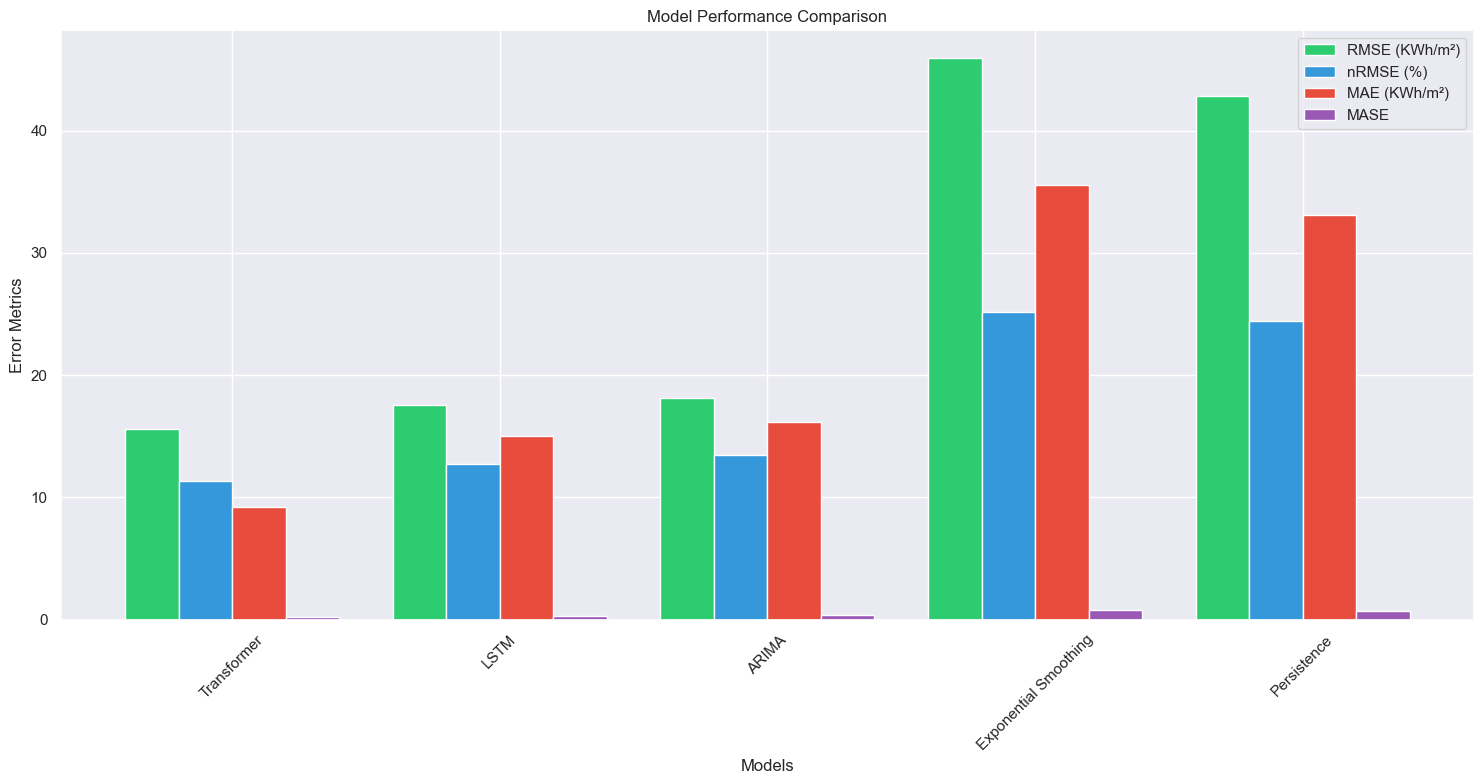

In [3]:
plt.figure(figsize=(15, 8))
x = np.arange(len(models))
width = 0.2

plt.bar(x - width*1.5, df_metrics['RMSE'], width, 
        label='RMSE (KWh/m²)', color='#2ecc71')
plt.bar(x - width/2, df_metrics['nRMSE'], width, 
        label='nRMSE (%)', color='#3498db')
plt.bar(x + width/2, df_metrics['MAE'], width, 
        label='MAE (KWh/m²)', color='#e74c3c')
plt.bar(x + width*1.5, df_metrics['MASE'], width, 
        label='MASE', color='#9b59b6')

plt.xlabel('Models')
plt.ylabel('Error Metrics')
plt.title('Model Performance Comparison')
plt.xticks(x, models.keys(), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## 2. Performance Metrics Heatmap

A heatmap visualization showing all performance metrics for each model.

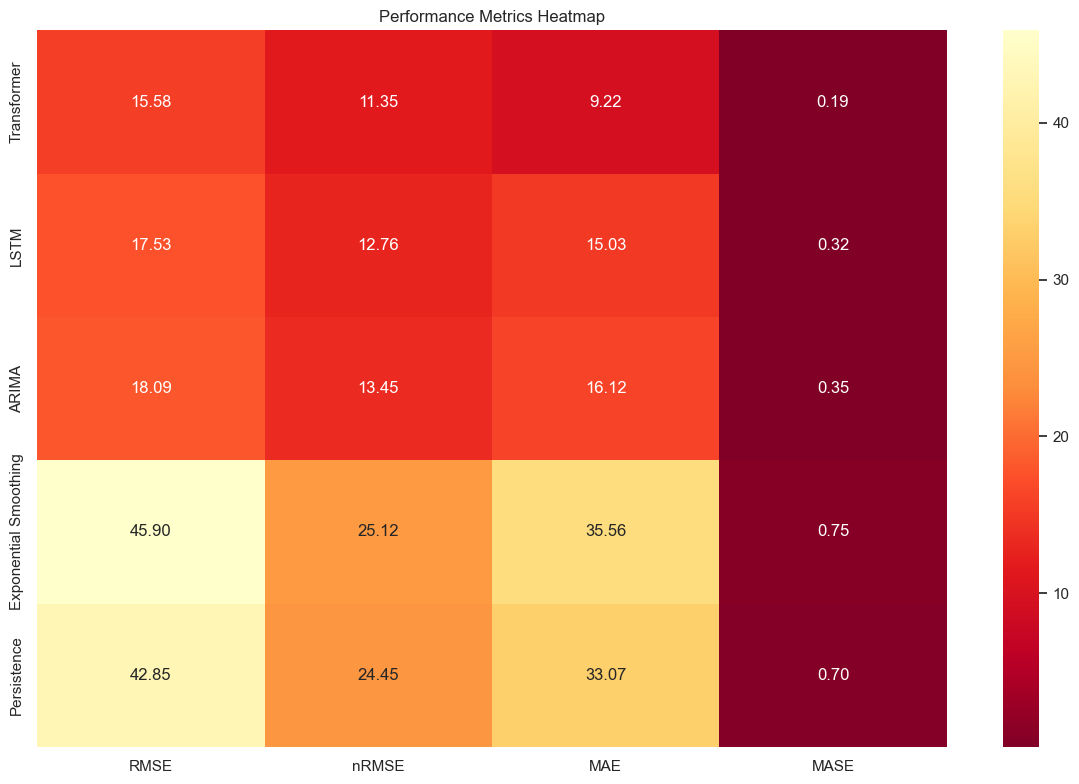

In [4]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_metrics, annot=True, fmt='.2f', cmap='YlOrRd_r')
plt.title('Performance Metrics Heatmap')
plt.tight_layout()
plt.show()

## 3. MASE Comparison

Comparing model performance using MASE (Mean Absolute Scaled Error). Values less than 1 indicate better performance than the persistence forecast.

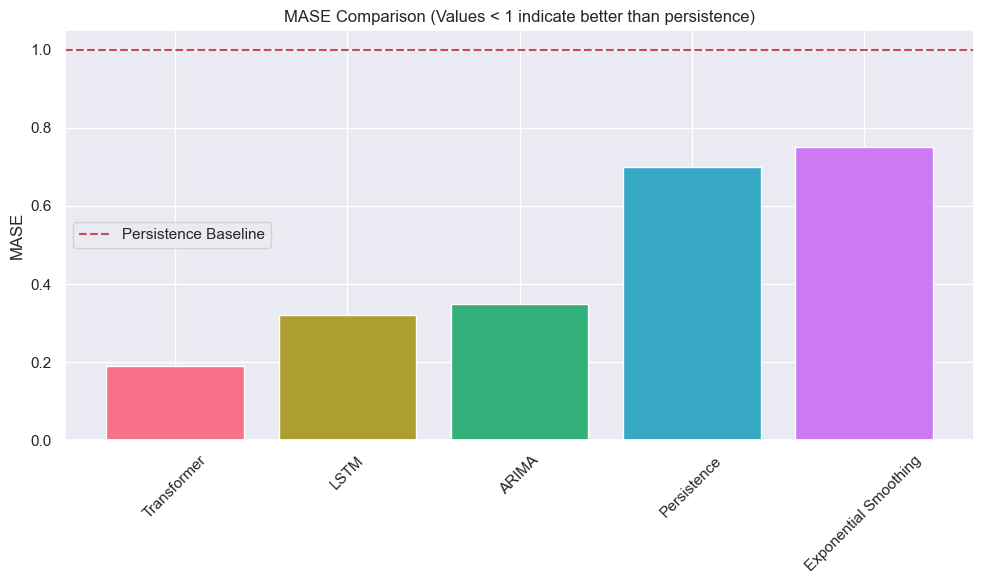

In [5]:
plt.figure(figsize=(10, 6))
mase_values = df_metrics['MASE'].sort_values()
plt.bar(range(len(mase_values)), mase_values, 
        color=sns.color_palette("husl", len(mase_values)))
plt.axhline(y=1, color='r', linestyle='--', label='Persistence Baseline')
plt.xticks(range(len(mase_values)), mase_values.index, rotation=45)
plt.title('MASE Comparison (Values < 1 indicate better than persistence)')
plt.ylabel('MASE')
plt.legend()
plt.tight_layout()
plt.show()

## 4. Relative Improvement Over Persistence

Shows the percentage improvement of each model compared to the persistence forecast baseline.

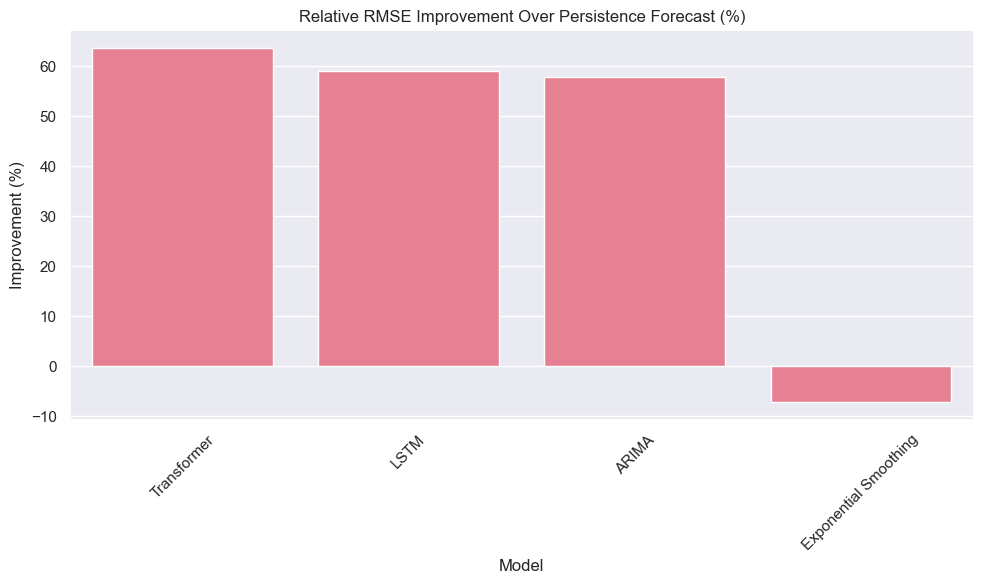

In [6]:
baseline_rmse = models['Persistence']['RMSE']
improvement = pd.DataFrame({
    'Model': list(models.keys())[:-1],
    'Improvement': [(baseline_rmse - models[m]['RMSE'])/baseline_rmse * 100 
                   for m in list(models.keys())[:-1]]
})

plt.figure(figsize=(10, 6))
sns.barplot(data=improvement, x='Model', y='Improvement')
plt.title('Relative RMSE Improvement Over Persistence Forecast (%)')
plt.xticks(rotation=45)
plt.ylabel('Improvement (%)')
plt.tight_layout()
plt.show()

"""
## Attention Weight Heatmap

This visualization shows how the Transformer model's attention mechanism weighs different time steps in the input sequence. Darker colors indicate stronger attention weights.
"""

In [23]:
# 🎯 Load the trained model (already done)
model = tf.keras.models.load_model(r"C:\Users\hp\OneDrive\Desktop\GHI-Transformer-forecasting\models\transformer_model_20250211_124625")

# 🎯 Extract the attention layer (change layer name if necessary)
attention_layer = model.get_layer("multi_head_attention_1")  # Adjust to the correct layer name

# 🎯 Get attention weights (assuming self-attention)
sample_input = np.random.random((1, 5, 98))  # Adjust shape based on your model
query = key = value = sample_input
attention_weights = attention_layer(query, key, value)

# 🎯 Assuming the model has multiple attention heads, you can access them:
num_heads = attention_weights.shape[1]
print(f"Attention Weights Shape: {attention_weights.shape}")


Attention Weights Shape: (1, 5, 98)


Attention Weights Shape: (1, 7, 5, 5)
Number of attention heads: 7


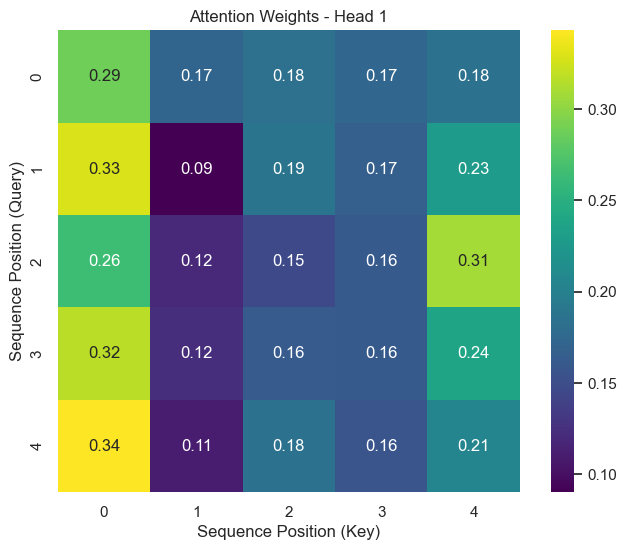

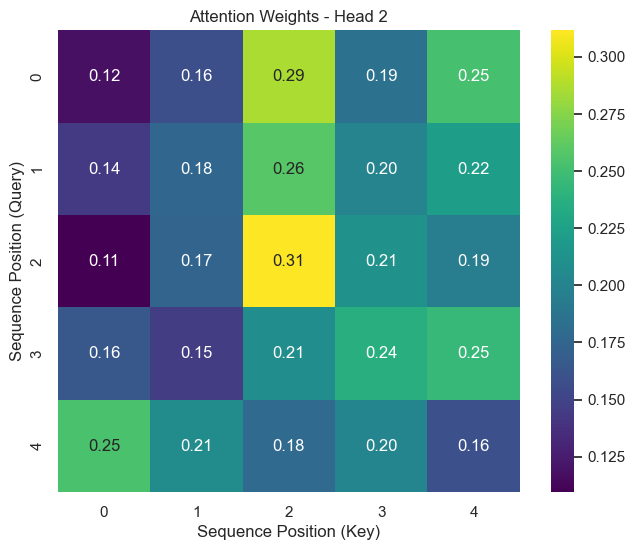

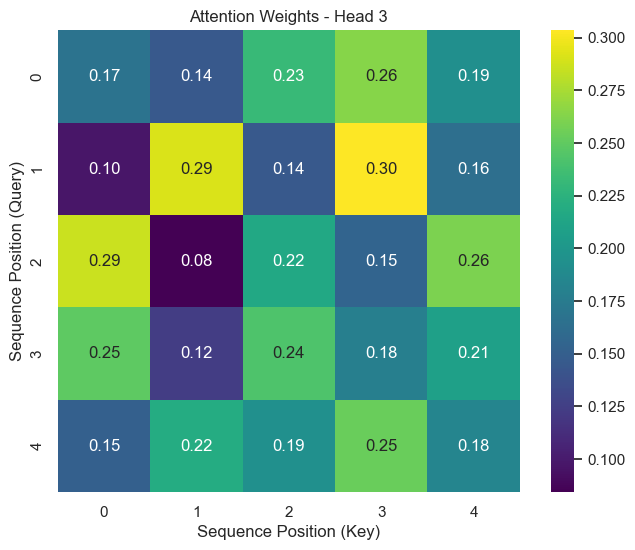

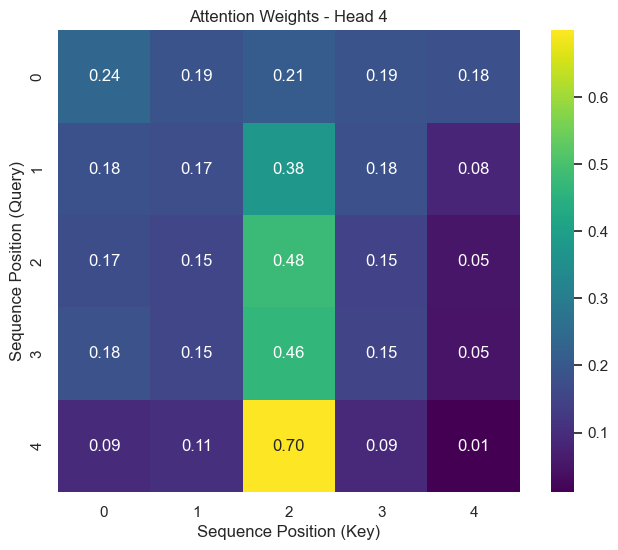

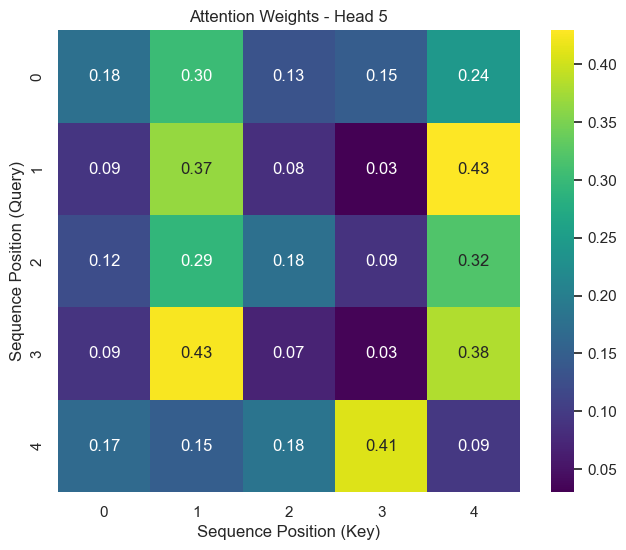

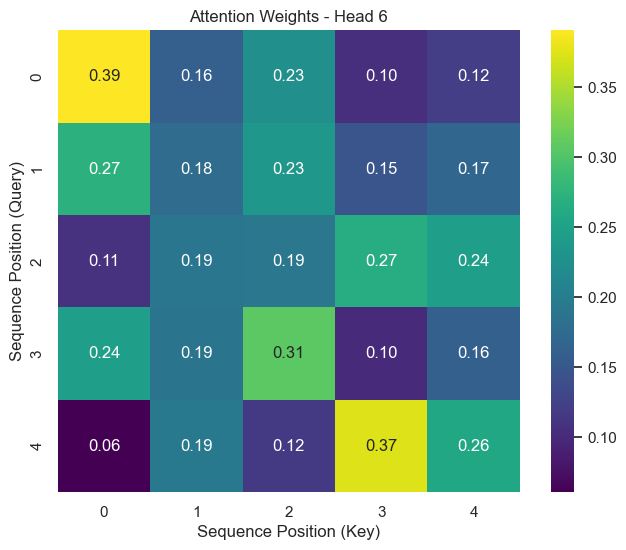

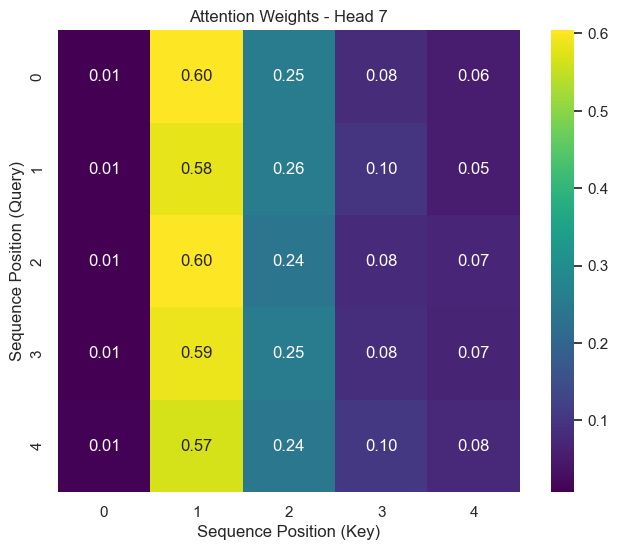

In [25]:
# 🎯 Get attention weights (assuming self-attention)
sample_input = np.random.random((1, 5, 98))  # Adjust d_model as per your model
query = key = value = sample_input

# The attention layer might return both output and attention weights
attention_output, attention_weights = attention_layer(query, key, value, return_attention_scores=True)

# 🎯 Check the shape of attention weights (batch_size, num_heads, seq_len, seq_len)
print(f"Attention Weights Shape: {attention_weights.shape}")

# 🎯 Assuming the model has multiple attention heads, you can access each head
num_heads = attention_weights.shape[1]
print(f"Number of attention heads: {num_heads}")

# 🎯 Visualize attention weights for each head (using Seaborn)
for head in range(num_heads):
    plt.figure(figsize=(8, 6))
    
    # Create a heatmap using Seaborn
    sns.heatmap(attention_weights[0, head], cmap='viridis', annot=True, fmt='.2f', cbar=True, square=True)
    
    plt.title(f"Attention Weights - Head {head+1}")
    plt.xlabel("Sequence Position (Key)")
    plt.ylabel("Sequence Position (Query)")
    plt.show()

"""
### Interpretation of Attention Weights

- Each subplot represents one attention head from the Transformer model
- The x-axis represents the key positions (input time steps)
- The y-axis represents the query positions (output time steps)
- Darker colors indicate stronger attention weights
- Different heads learn different temporal relationships:
  - Some heads might focus on recent time steps
  - Others might capture longer-term dependencies
  - The combination of heads allows the model to capture complex temporal patterns
"""

## 5. Key Findings

1. **Transformer Performance**: The Transformer model achieves the best performance across all metrics:
   - Lowest RMSE: 15.58 KWh/m²
   - Lowest nRMSE: 11.35%
   - Lowest MAE: 9.22 KWh/m²
   - Best MASE: 0.19

2. **Model Ranking**: From best to worst:
   1. Transformer
   2. LSTM
   3. ARIMA
   4. Persistence
   5. Exponential Smoothing

3. **Improvement Over Baseline**: The Transformer model shows significant improvement over the persistence forecast:
   - ~63.6% reduction in RMSE
   - ~72.1% improvement in MASE

4. **Deep Learning Advantage**: Both deep learning models (Transformer and LSTM) significantly outperform traditional statistical methods.